<a href="https://colab.research.google.com/github/vitormedeiroos/automacoes_raspagens/blob/main/bib_sweetviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dados Financeiros

> Cotações diárias:"
  pandas_datareader, yfinance, yahoofinancials, investpy.

  Outros timeframes:
  yahoo_fin, metatrader
  



In [4]:
import yfinance as yf

# Realizando joins

In [5]:
from IPython.display import Image
Image(url = 'https://www.thecrazyprogrammer.com/wp-content/uploads/2019/05/Joins-in-SQL-Inner-Outer-Left-and-Right-Join.jpg')


In [6]:
mglu_teste = yf.download ('MGLU3.SA', start='2020-01-01', end= '2020-07-01')

[*********************100%%**********************]  1 of 1 completed


In [7]:
mglu_teste.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,12.075,12.3325,11.9275,12.3325,12.029735,29600800
2020-01-03,12.125,12.3325,12.0750,12.2225,11.922435,26737600
2020-01-06,12.100,12.3275,11.9500,12.2325,11.932190,27359200
2020-01-07,12.235,12.3000,12.1250,12.1975,11.898049,26818800
2020-01-08,12.155,12.5875,12.1250,12.5725,12.263843,40007200


In [8]:
weg_teste= yf.download('WEGE3.SA', start = '2020-01-01', end = '2020-10-01')

[*********************100%%**********************]  1 of 1 completed


In [9]:
weg_teste

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,17.450001,17.735001,17.360001,17.620001,16.768703,5876000
2020-01-03,17.500000,17.625000,17.334999,17.395000,16.554575,7345800
2020-01-06,17.350000,17.549999,17.195000,17.440001,16.597404,6366600
2020-01-07,17.455000,17.584999,17.330000,17.575001,16.725876,6303600
2020-01-08,17.600000,17.610001,16.910000,16.910000,16.093008,8153800
...,...,...,...,...,...,...
2020-09-24,31.254999,32.560001,31.254999,32.244999,30.901945,10135200
2020-09-25,31.905001,32.134998,31.549999,32.125000,30.786947,6179000
2020-09-28,32.549999,33.055000,31.295000,31.445000,30.151449,14994000


In [10]:
weg_teste.rename(columns = {'Adj Close': 'WEGE3'},inplace= True)

In [11]:
mglu_teste.rename(columns = {'Adj Close': 'MGLU3'},inplace= True)

In [12]:
mglu_teste

,Open,High,Low,Close,MGLU3,Volume
Date,,,,,,
2020-01-02,12.075000,12.332500,11.927500,12.332500,12.029735,29600800
2020-01-03,12.125000,12.332500,12.075000,12.222500,11.922435,26737600
2020-01-06,12.100000,12.327500,11.950000,12.232500,11.932190,27359200
2020-01-07,12.235000,12.300000,12.125000,12.197500,11.898049,26818800
2020-01-08,12.155000,12.587500,12.125000,12.572500,12.263843,40007200
...,...,...,...,...,...,...
2020-06-24,17.549999,17.895000,17.049999,17.450001,17.318308,42778400
2020-06-25,17.477501,17.674999,17.184999,17.422501,17.291018,31712800
2020-06-26,17.372499,17.727501,17.162500,17.337500,17.206657,32971600


In [13]:
#merge = fusao = join
novo_df = pd.merge(weg_teste, mglu_teste, how = 'inner', on= 'Date')

In [14]:
novo_df.head(10)

,Open_x,High_x,Low_x,Close_x,WEGE3,Volume_x,Open_y,High_y,Low_y,Close_y,MGLU3,Volume_y
Date,,,,,,,,,,,,
2020-01-02,17.450001,17.735001,17.360001,17.620001,16.768703,5876000,12.0750,12.3325,11.9275,12.3325,12.029735,29600800
2020-01-03,17.500000,17.625000,17.334999,17.395000,16.554575,7345800,12.1250,12.3325,12.0750,12.2225,11.922435,26737600
2020-01-06,17.350000,17.549999,17.195000,17.440001,16.597404,6366600,12.1000,12.3275,11.9500,12.2325,11.932190,27359200
2020-01-07,17.455000,17.584999,17.330000,17.575001,16.725876,6303600,12.2350,12.3000,12.1250,12.1975,11.898049,26818800
2020-01-08,17.600000,17.610001,16.910000,16.910000,16.093008,8153800,12.1550,12.5875,12.1250,12.5725,12.263843,40007200
2020-01-09,17.000000,17.030001,16.610001,16.660000,15.855083,9843000,12.6250,13.0575,12.6050,13.0200,12.700356,44120000
2020-01-10,16.750000,17.150000,16.745001,17.000000,16.178659,6283800,13.0225,13.2625,12.7625,12.9500,12.632074,37484400
2020-01-13,17.040001,17.215000,17.004999,17.160000,16.330927,8200200,13.0500,13.5575,13.0375,13.5575,13.224660,34307200
2020-01-14,17.219999,17.500000,17.045000,17.500000,16.654495,10054000,13.5000,13.7625,13.4000,13.5000,13.168571,33180800


In [15]:
cotacoes = novo_df[['WEGE3', 'MGLU3']]

In [16]:
cotacoes.head()

,WEGE3,MGLU3
Date,,
2020-01-02,16.768703,12.029735
2020-01-03,16.554575,11.922435
2020-01-06,16.597404,11.932190
2020-01-07,16.725876,11.898049
2020-01-08,16.093008,12.263843


<Axes: xlabel='Date'>

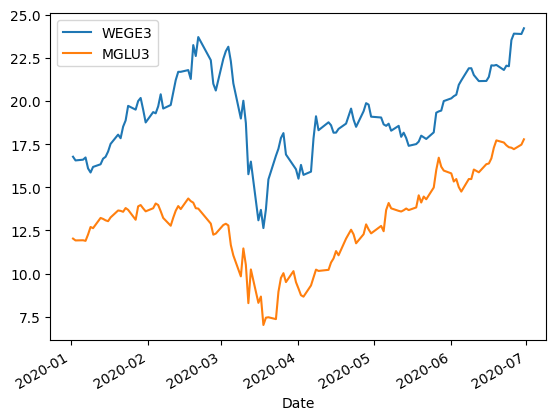

In [17]:
cotacoes.plot()

## 5.0 ANÁLISE DE DADOS

In [18]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 36.9 MB/s eta 0:00:00


In [19]:
import sweetviz as sv

In [20]:
relatorio = sv.analyze(cotacoes)

                                             |          | [  0%]   00:00 -> (? left)

In [21]:
relatorio.show_html('relatorio_weg_mglu.html')

Report relatorio_weg_mglu.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: >

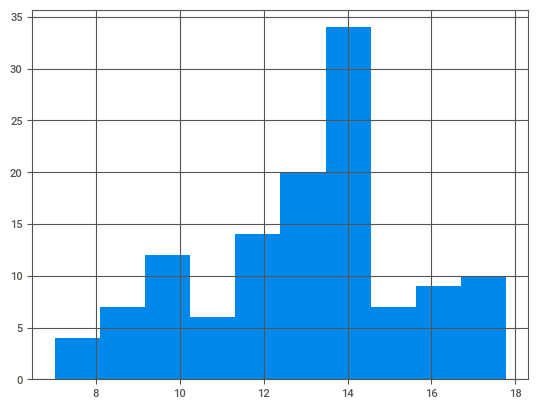

In [22]:
cotacoes.MGLU3.hist()

<Axes: >

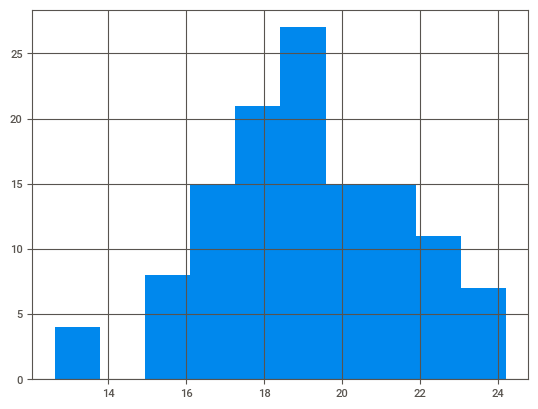

In [23]:
cotacoes.WEGE3.hist()